This is a modified version of the [scikit tutorial ](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) on creating validation curves. This first line makes it possible to embed plots in this notebook.  We also want to import the pyplot library:


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plotting Validation Curves

In this plot you can see the training scores and validation scores of an $k$-nearest neighbors
for different values of the kernel parameter $k$. First, let us import some libraries and the digits data set for this example.  We'll create a default classifier to pass to the validation algorithm:

In [2]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

clf = KNeighborsClassifier() #default classifier

Let's run our classifier on the data for $k$ values from 1 to 41, spaced by 4 (i.e., only odd values).  We'll use the [`arange` function](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange) to generate this range:

In [3]:
k_range = np.arange(1, 42, 4).astype('int')
print(k_range)

[ 1  5  9 13 17 21 25 29 33 37 41]


Now we'll run the validation test using `validation_curve` which creates a train/test split for us and then runs the classifier for each setting of $k$.  Note that `param_name` matches the specific term used by scikit for that classifier (in this case, the `n_neighbors` parameters for the `KNeighborsClassifier`).  Additionally, you can take advantage of multi-threading/multi-core machines but using the `n_jobs` setting which will run tests in parallel.  Not all scikit methods have this capability, but methods that are trivial to parallelize (Random Forests, Grid Search, Validation Curves) do have them.  You probably don't want to go higher than 4 unless you know the machine has more than 4 cores, but try out some values to see if you get a speed up on large data sets: 

In [4]:
train_scores, test_scores = validation_curve(clf, X, y, param_name="n_neighbors", param_range=k_range,cv=3,n_jobs=3)
print(train_scores.shape)
print(test_scores.shape)

(11, 3)
(11, 3)


The method returns two separate 2D arrays (for the train and test scores respectively).  The first dimension corresponds with the range of the parameter (here, 11 for the values of $k=1,5,9,\dots,41$) and the second dimension is for each fold.  So, if we wanted to get the test scores for all three folds for $k=1$, we'd print the following:

In [5]:
print(test_scores[0,:])

[0.95659432 0.96994992 0.96494157]


Or the training scores for all of the values of $k$ for just the first fold:

In [6]:
print(train_scores[:,0])

[1.         0.99248748 0.98664441 0.98414023 0.98163606 0.97328881
 0.97078464 0.96744574 0.96327212 0.95659432 0.95325543]


For the curve, we'll want to take the average across the folds for each value of $k$ (we could calculate standard deviation as well if we wanted to add error bars, we'll keep it simple for this exercise):

In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

Let's plot the scores using a line (matplotlib can also do scatter plots or bar graphs if you prefer).  The [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method takes in the x-values, y-values and several other optional parameters that you should read about (there a couple dozen listed under **Other parameters**).  Here, we are going to add a label that will be displayed in the graph legend and a color for the line so we can distinguish the two lines:

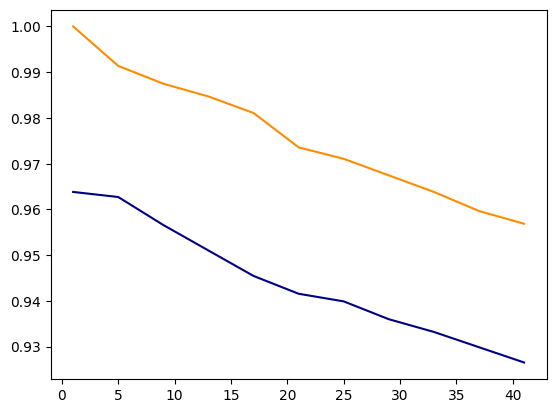

In [8]:
plt.plot(k_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(k_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.show()

Each call to `plot` adds a line.  The `show` function is what we call when we are done customizing our graph and want to render and display it.  Pretty neat! But....

 


## Formatting Plots

The scientist in you should point out why that's a terrible graph.  There are no axis labels, and the y-axis is squished to small range of values making it look much more drammatic that it really is.  Let's add some bells and whistles to make it a better visualization.  The code below:

 * Adds a title (with extra-large font - small fonts on graphs are the worst!)
 * Labels both axes and scale the y-axis to reflect the true range of accuracies (0 to 1).  Here, we show how to set the x-ticks to reflect the actual values of $k$ used.  This isn't always a good idea, but is better reflection of the data in this case.
 * Add a legend to the graph to identify the plots.

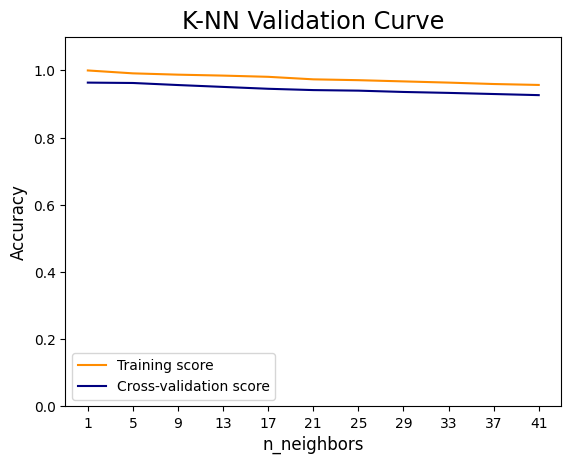

In [9]:

plt.title("K-NN Validation Curve", fontsize="xx-large")
plt.xlabel("n_neighbors",fontsize="large")
plt.ylabel("Accuracy",fontsize="large")
plt.ylim(0.0, 1.1)
plt.xticks(k_range)

plt.plot(k_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(k_range, test_scores_mean, label="Cross-validation score", color="navy")

plt.legend(loc="best")
plt.show()

Now, you may look at this curve and think "it's really hard to see any change, the y-axis isn't very helpful".  Feel free to add a second plot with e.g., a y-axis from 0.8 to 1.0.  But it is important that you understand that the default should be to show the full range, and then supplement that with a zoomed-in view that is explained to the reader e.g., in the caption.

## Log Space for Exponential Values

Some parameters are spaced based on orders of magnitude instead of a short range on a linear scale.  For example, SVMs are often tuned based on orders of magnitude both for the $C$ parameter and the $gamma$ parameter.  Plotting linear axes in this case is not very helpful, so we want the x-axis to grow logarithmically:

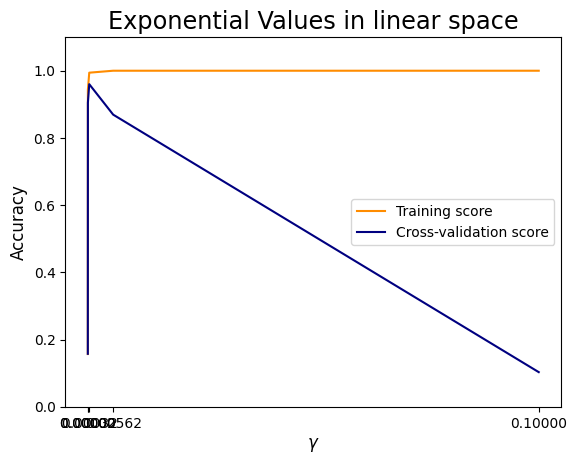

In [10]:
from sklearn.svm import SVC

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,
 scoring="accuracy", n_jobs=3)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

plt.title("Exponential Values in linear space", fontsize="xx-large")
plt.xlabel(r"$\gamma$",fontsize="large") #if you want to use latex to print special characters
plt.ylabel("Accuracy",fontsize="large")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")

plt.legend(loc="best")
plt.show()




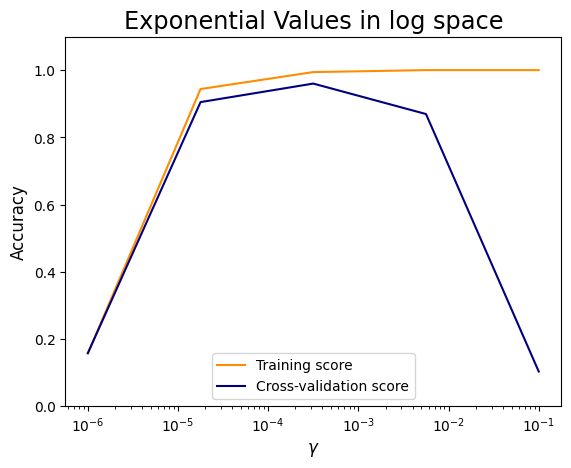

In [11]:
"""Let's redo this with a log-scaled axis.  We only need to add one line of code
plt.semilogx()
"""

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

plt.title("Exponential Values in log space", fontsize="xx-large")
plt.xlabel(r"$\gamma$",fontsize="large") #if you want to use latex to print special characters
plt.ylabel("Accuracy",fontsize="large")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)

plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")

plt.semilogx() # log scale the x-axis


plt.legend(loc="best")
plt.show()